In [176]:
import nsetools
import nsepy

In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime 
from dateutil.relativedelta import *
import calendar

In [178]:
current_time = datetime.datetime.now() 
current_year=current_time.year
current_day=current_time.day
current_month=current_time.month



           Symbol Series  Prev Close    Open    High     Low    Last   Close
Date                                                                        
2015-09-01   SBIN     EQ      247.35  244.85  244.85  237.70  239.30  239.10
2015-09-02   SBIN     EQ      239.10  242.65  243.00  230.10  230.35  230.55
2015-09-03   SBIN     EQ      230.55  232.65  235.40  231.00  231.85  232.25
2015-09-04   SBIN     EQ      232.25  231.90  231.90  224.00  225.00  225.15
2015-09-07   SBIN     EQ      225.15  227.10  227.50  220.15  221.10  221.10


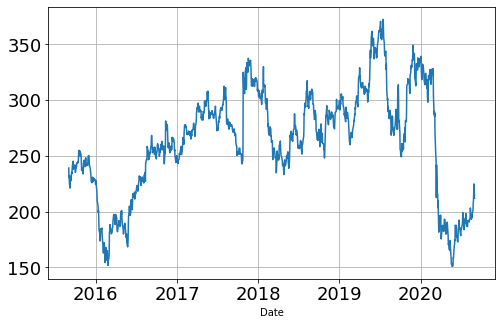

In [181]:
#I have selected SBIN as my stock
sbin = nsepy.get_history(symbol='SBIN',start=datetime.date(2015,9,1),end=datetime.date(current_year,current_month,current_day))
sbin=sbin.iloc[:,0:8]
#sbin.to_csv("hi.csv")
#sbin=pd.read_csv("hi.csv")
print(sbin.head())
sbin['Close'].plot(grid=True,figsize=(8,5))

In [182]:
#I have taken the short window of 42 days and long window of 252 days
sbin['42d'] = np.round(sbin['Close'].rolling(window=42).mean(),2)
sbin['252d'] = np.round(sbin['Close'].rolling(window=252).mean(),2)

In [183]:
sbin.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,42d,252d
Date,,,,,,,,,,
2020-08-25,SBIN,EQ,201.45,204.00,208.45,202.70,208.25,207.95,191.94,251.18
2020-08-26,SBIN,EQ,207.95,208.50,210.35,206.15,209.90,209.85,192.66,250.89
2020-08-27,SBIN,EQ,209.85,210.50,216.50,210.50,216.00,215.65,193.55,250.64
2020-08-28,SBIN,EQ,215.65,217.00,225.90,216.80,225.40,224.85,194.50,250.47
2020-08-31,SBIN,EQ,224.85,231.55,231.55,210.35,211.90,212.00,195.14,250.23


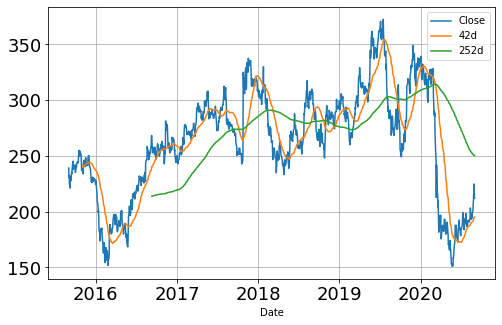

In [184]:
sbin[['Close','42d','252d']].plot(grid=True,figsize=(8,5))

In [185]:
#Starting with Strategy and backtesting

In [186]:
sbin['42-252'] = sbin['42d'] - sbin['252d']


In [187]:
#arbitrarily taking 45 as the threshold
X = 45
sbin['Stance'] = np.where(sbin['42-252'] > X, 1, 0)
sbin['Stance'] = np.where(sbin['42-252'] < -X, -1, sbin['Stance'])
sbin['Stance'].value_counts()

 0    1110
-1     100
 1      24
Name: Stance, dtype: int64

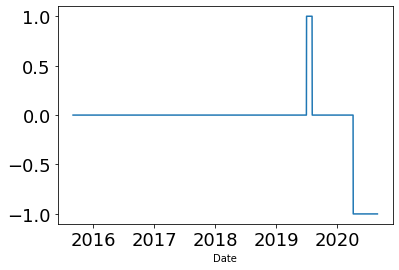

In [188]:
sbin['Stance'].plot(lw=1.5,ylim=[-1.1,1.1])
#Stance is 1:-long -1:-short 0:-Stay 

In [189]:
sbin['Market Returns'] = np.log(sbin['Close'] / sbin['Close'].shift(1))
sbin['Strategy'] = sbin['Market Returns'] * sbin['Stance'].shift(1)

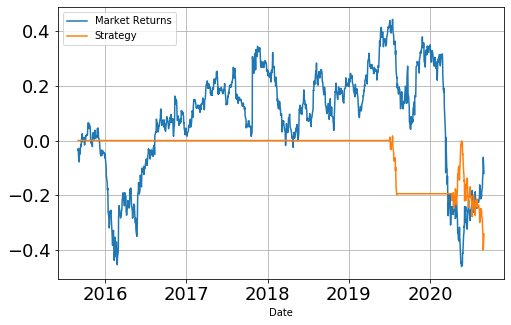

In [190]:
sbin[['Market Returns','Strategy']].cumsum().plot(grid=True,figsize=(8,5))
#This is the plot of market returns aand our SMA strategy